Name : Saarthak Khamkar   
Roll No. : D088   
SAP ID : 60009230057

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X = np.array([[0.5], [2.5], [3.5]])
Y = np.array([[0.2], [0.9], [1.2]])
# Hyperparameters
learning_rate = 0.1
epochs = 50

In [ ]:
# Initialize weights and bias randomly
weight_sgd = np.random.randn(1, 1)
bias_sgd = np.random.randn(1)
weight_bgd = weight_sgd.copy()
bias_bgd = bias_sgd.copy()
print(f"Initial Weight: {weight_bgd}")
print(f"Initial Bias: {bias_bgd}")

Initial Weight: [[-0.16128571]]
Initial Bias: [0.40405086]


In [ ]:
def linear_activation(x, w, b):
    return np.dot(x, w) + b

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def accuracy(y_true, y_pred, threshold=0.5):
    y_true_bin = (y_true > threshold).astype(int)
    y_pred_bin = (y_pred > threshold).astype(int)
    return np.mean(y_true_bin == y_pred_bin)

In [ ]:
# For plotting error surface: fix bias and vary weight or vice versa
def plot_error_surface(X, Y, weight_range, bias_range):
    W, B = np.meshgrid(weight_range, bias_range)
    losses = np.zeros(W.shape)
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            y_pred = linear_activation(X, W[i,j], B[i,j])
            losses[i,j] = mse_loss(Y, y_pred)
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(W, B, losses, cmap='viridis')
    ax.set_xlabel('Weight')
    ax.set_ylabel('Bias')
    ax.set_zlabel('Loss')
    ax.set_title('Error Surface')
    plt.show()

In [ ]:
# Store history for plotting
mse_history_sgd = []
accuracy_history_sgd = []
mse_history_bgd = []
accuracy_history_bgd = []

In [ ]:
for epoch in range(epochs):
    mse_epoch = []
    acc_epoch = []
    for x, y in zip(X, Y):
        y_pred = linear_activation(x, weight_sgd, bias_sgd)
        error = y - y_pred
        weight_sgd += learning_rate * error * x.reshape(-1,1)
        bias_sgd += learning_rate * error
        mse_epoch.append((error ** 2).item())
        acc_epoch.append(accuracy(y, y_pred.reshape(1,1)))

    avg_mse = np.mean(mse_epoch)
    avg_acc = np.mean(acc_epoch)

    mse_history_sgd.append(avg_mse)
    accuracy_history_sgd.append(avg_acc)

    print(f"Epoch {epoch+1} SGD - Weights: {weight_sgd.flatten()}, Bias: {bias_sgd}, Accuracy: {avg_acc:.4f}")


Epoch 1 SGD - Weights: [0.23599672], Bias: [0.53346602], Accuracy: 0.6667
Epoch 2 SGD - Weights: [0.21218926], Bias: [0.4844847], Accuracy: 0.6667
Epoch 3 SGD - Weights: [0.22322289], Bias: [0.45338529], Accuracy: 0.6667
Epoch 4 SGD - Weights: [0.23064639], Bias: [0.42338319], Accuracy: 0.6667
Epoch 5 SGD - Weights: [0.23775647], Bias: [0.39570295], Accuracy: 0.6667
Epoch 6 SGD - Weights: [0.24432049], Bias: [0.37006247], Accuracy: 0.6667
Epoch 7 SGD - Weights: [0.25040044], Bias: [0.34632012], Accuracy: 1.0000
Epoch 8 SGD - Weights: [0.25603033], Bias: [0.32433466], Accuracy: 1.0000
Epoch 9 SGD - Weights: [0.26124362], Bias: [0.30397613], Accuracy: 1.0000
Epoch 10 SGD - Weights: [0.26607113], Bias: [0.28512415], Accuracy: 1.0000
Epoch 11 SGD - Weights: [0.27054139], Bias: [0.26766722], Accuracy: 1.0000
Epoch 12 SGD - Weights: [0.27468086], Bias: [0.25150211], Accuracy: 1.0000
Epoch 13 SGD - Weights: [0.278514], Bias: [0.23653323], Accuracy: 1.0000
Epoch 14 SGD - Weights: [0.28206349],

In [ ]:
for epoch in range(epochs):
    y_pred = linear_activation(X, weight_bgd, bias_bgd)
    error = Y - y_pred
    dW = np.dot(X.T, error) / len(X)
    dB = np.mean(error)
    weight_bgd += learning_rate * dW
    bias_bgd += learning_rate * dB
    mse = mse_loss(Y, y_pred)
    acc = accuracy(Y, y_pred)

    mse_history_bgd.append(mse)
    accuracy_history_bgd.append(acc)

    print(f"Epoch {epoch+1} BGD - Weights: {weight_bgd.flatten()}, Bias: {bias_bgd}, Accuracy: {acc:.4f}")


Epoch 1 BGD - Weights: [0.07030684], Bias: [0.47525768], Accuracy: 0.3333
Epoch 2 BGD - Weights: [0.1417259], Bias: [0.48916543], Accuracy: 0.6667
Epoch 3 BGD - Weights: [0.1654947], Bias: [0.48620827], Accuracy: 0.6667
Epoch 4 BGD - Weights: [0.17504872], Bias: [0.47839692], Accuracy: 0.6667
Epoch 5 BGD - Weights: [0.18032394], Bias: [0.46929668], Accuracy: 0.6667
Epoch 6 BGD - Weights: [0.18427386], Bias: [0.45996349], Accuracy: 0.6667
Epoch 7 BGD - Weights: [0.18777728], Bias: [0.4507078], Accuracy: 0.6667
Epoch 8 BGD - Weights: [0.19109645], Bias: [0.44161861], Accuracy: 0.6667
Epoch 9 BGD - Weights: [0.19431047], Bias: [0.43271919], Accuracy: 0.6667
Epoch 10 BGD - Weights: [0.19744394], Bias: [0.42401333], Accuracy: 0.6667
Epoch 11 BGD - Weights: [0.20050525], Bias: [0.41549915], Accuracy: 0.6667
Epoch 12 BGD - Weights: [0.20349799], Bias: [0.40717309], Accuracy: 0.6667
Epoch 13 BGD - Weights: [0.20642424], Bias: [0.39903122], Accuracy: 0.6667
Epoch 14 BGD - Weights: [0.20928566],

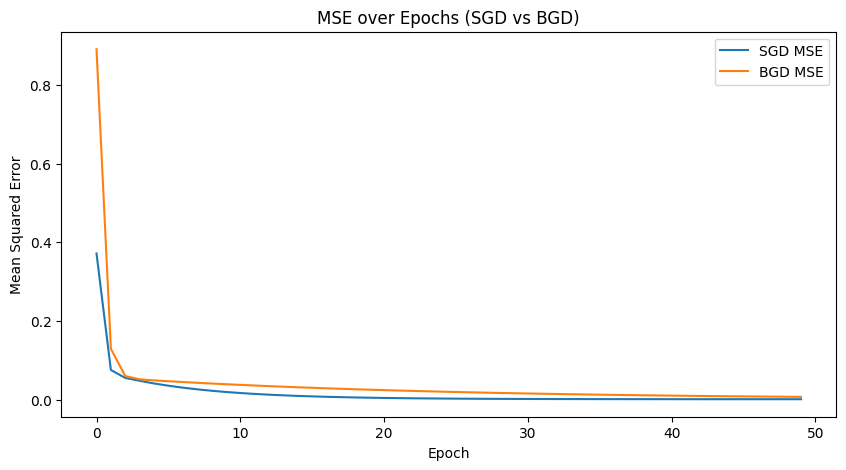

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(epochs), mse_history_sgd, label='SGD MSE')
plt.plot(range(epochs), mse_history_bgd, label='BGD MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE over Epochs (SGD vs BGD)')
plt.legend()
plt.show()

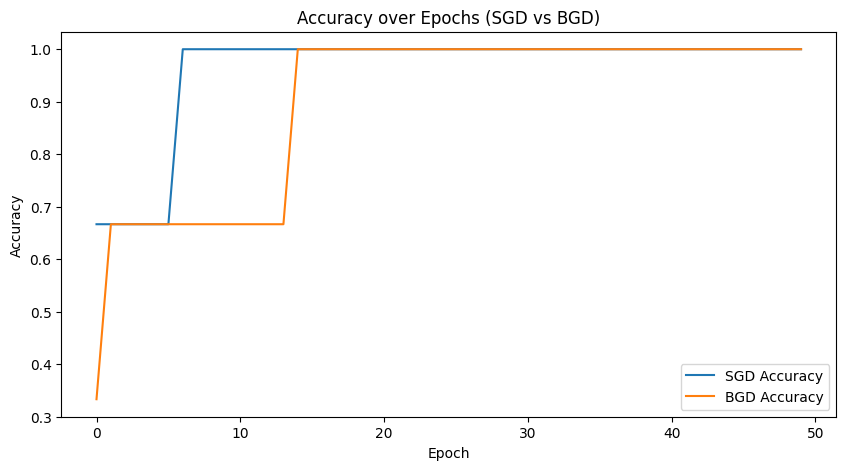

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(epochs), accuracy_history_sgd, label='SGD Accuracy')
plt.plot(range(epochs), accuracy_history_bgd, label='BGD Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs (SGD vs BGD)')
plt.legend()
plt.show()

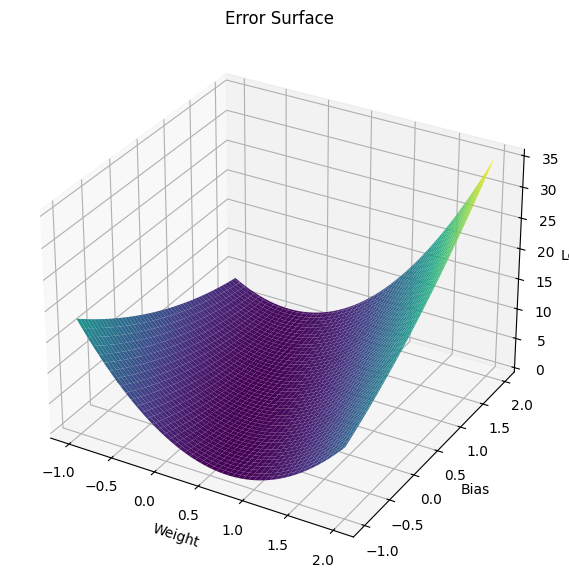

In [ ]:
weight_range = np.linspace(-1, 2, 100)
bias_range = np.linspace(-1, 2, 100)
plot_error_surface(X, Y, weight_range, bias_range)


In [ ]:
print("Final Weights (SGD):", weight_sgd.flatten())
print("Final Bias (SGD):", bias_sgd)
print("Final Weights (BGD):", weight_bgd.flatten())
print("Final Bias (BGD):", bias_bgd)

Final Weights (SGD): [0.32369023]
Final Bias (SGD): [0.0601146]
Final Weights (BGD): [0.27922822]
Final Bias (BGD): [0.19645648]


Colab Link : https://colab.research.google.com/drive/1EXCWv9dPJBwyiGii9oW24A1AJ-FqNxTN?usp=sharing